# Import Data and Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving cleaned_df.csv to cleaned_df.csv


# Dataset Overview

In [3]:
list(df.columns)

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [4]:
df['Education Level'].value_counts()

Bachelor's Degree    3021
Master's Degree      1858
PhD                  1369
High School           436
Name: Education Level, dtype: int64

We need to combine:
- Bachelor's Degree and Bachelor's together
- Master's Degree and Master's
- PhD and phD

In [5]:
df["Education Level"].replace("Bachelor's", "Bachelor's Degree", inplace=True)
df["Education Level"].replace("Master's", "Master's Degree", inplace=True)
df["Education Level"].replace("phD", "PhD", inplace=True)


In [6]:
df['Education Level'].value_counts()

Bachelor's Degree    3021
Master's Degree      1858
PhD                  1369
High School           436
Name: Education Level, dtype: int64

In [7]:
df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       316
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      3671
Female    3013
Name: Gender, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      3671
Female    3013
Name: Gender, dtype: int64

In [10]:
df.shape

(6684, 6)

## Missing Value Checking

In [11]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [14]:
df = df.dropna(how='any')

In [15]:

df.shape

(6684, 6)

In [16]:

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Age,Years of Experience,Salary
count,6684.00,6684.00,6684.00
mean,33.61,8.08,115307.18
std,7.60,6.03,52806.81
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


# Correlation

In [17]:
cor_df = df.loc[:,['Age', 'Years of Experience', 'Salary']]
cor_result = cor_df.corr()
cor_result

,Age,Years of Experience,Salary
Age,1.00,0.94,0.73
Years of Experience,0.94,1.00,0.81
Salary,0.73,0.81,1.00


Text(0.5, 1.0, 'Correlation Heatmap')

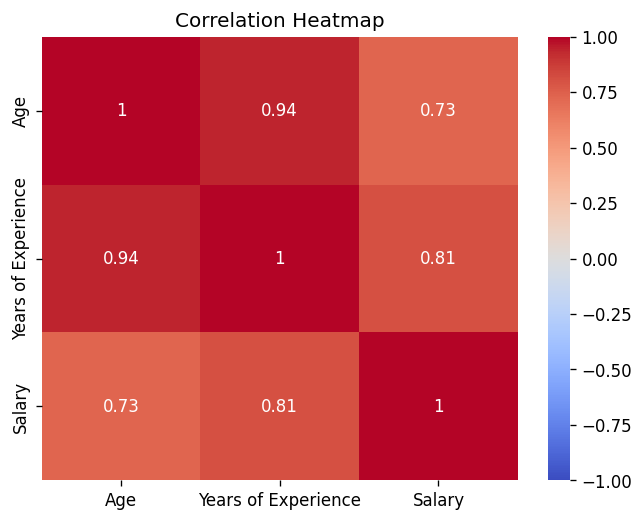

In [18]:
plt.rcParams['figure.dpi'] = 120
sns.heatmap(cor_result, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")

# Descriptive Plots

## Data vs. Salary

In [19]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('<b>Gender','<b>Education Level','<b>Age', '<b>Years of Experience'))

fig.add_trace(go.Box(x=df['Gender'], y=df['Salary']), row=1, col=1).update_yaxes(title_text='<b>Salary'),
fig.add_trace(go.Box(x=df['Education Level'], y=df['Salary']), row=1, col=2)
fig.add_trace(go.Box(x=df['Age'], y=df['Salary']), row=2, col=1)
fig.add_trace(go.Box(x=df['Years of Experience'], y=df['Salary']), row=2, col=2)


fig.update_xaxes(categoryorder='array', categoryarray=["Female", "Male"], row=1, col=1)
fig.update_xaxes(categoryorder='array', categoryarray=["High School", "Bachelor's Degree", "Master's Degree", "PhD"], row=1, col=2)
fig.update_xaxes(categoryorder='array', categoryarray=["High School", "Bachelor's Degree", "Master's Degree", "PhD"], row=3, col=1)

fig.update_layout(title='<b>Data Distribution with respect to Salary', height=900, width=1000,
                 showlegend=False,
                 title_font_size = 20,
                title_x=0.5)

fig.show()

## Education vs. Salary

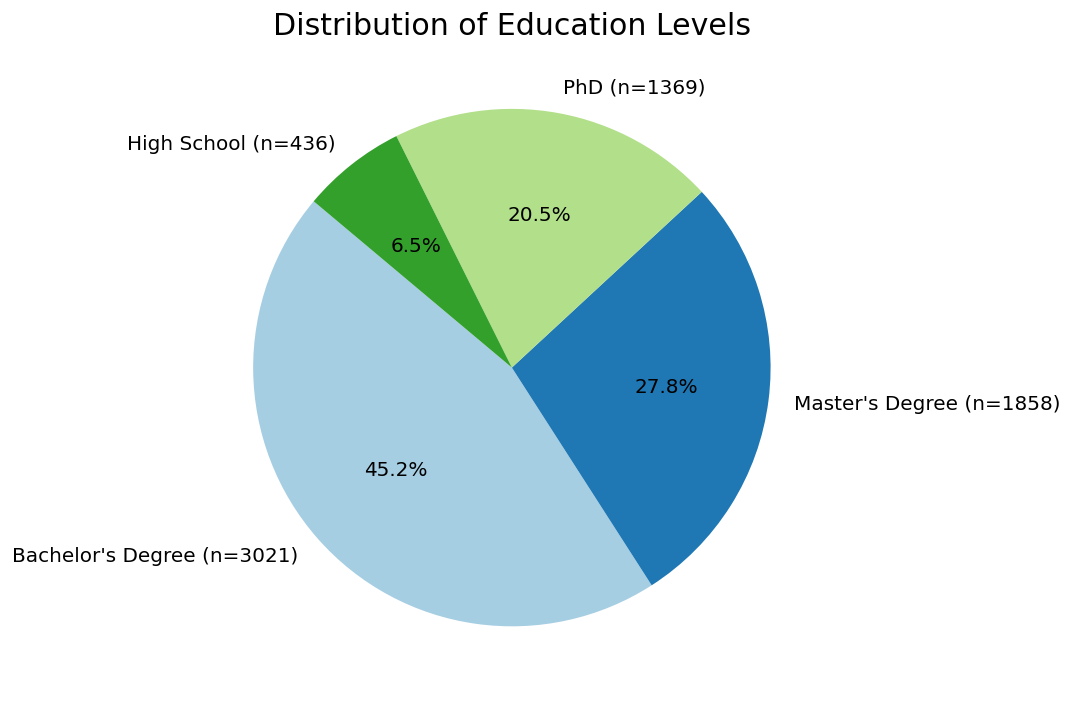

In [20]:
plt.rcParams['figure.dpi'] = 120
education_counts = df['Education Level'].value_counts()
labels = [f"{label} (n={count})" for label, count in zip(education_counts.index, education_counts)]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(education_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})
plt.title('Distribution of Education Levels', fontsize=18)
plt.show()

## Confounding Variables: Year of Experience & Gender

In [21]:

fig = make_subplots(rows=1, cols=1, subplot_titles=('<b>Education Level',))

fig.add_trace(go.Box(x=df['Education Level'], y=df['Years of Experience']), row=1, col=1).update_yaxes(title_text='<b>Years of Experience')

fig.update_xaxes(categoryorder='array', categoryarray=["High School", "Bachelor's Degree", "Master's Degree", "PhD"], row=1, col=1)

fig.update_layout(title='<b>Data Distribution with respect to YOE', height=450, width=500,
                 showlegend=False,
                 title_font_size = 20,
                title_x=0.5)

fig.show()


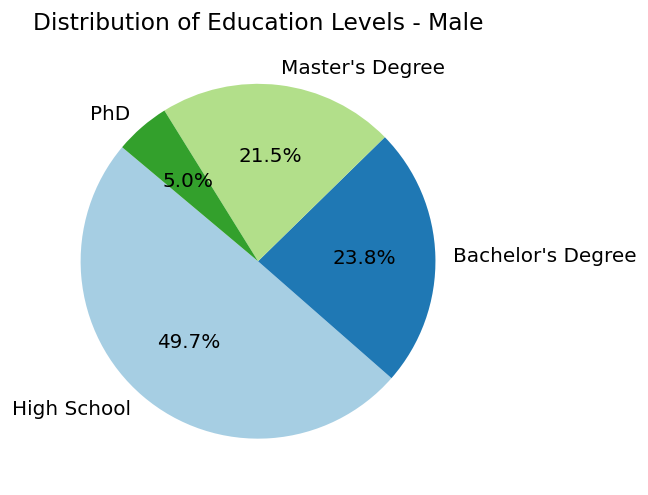

In [22]:

male_edu_count = df.loc[df['Gender'] == "Male"]["Education Level"].value_counts()
female_edu_count = df.loc[df['Gender'] == "Female"]["Education Level"].value_counts()

plt.pie(male_edu_count, labels=["High School", "Bachelor's Degree", "Master's Degree", "PhD"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})
plt.title('Distribution of Education Levels - Male', fontsize=14)
plt.show()


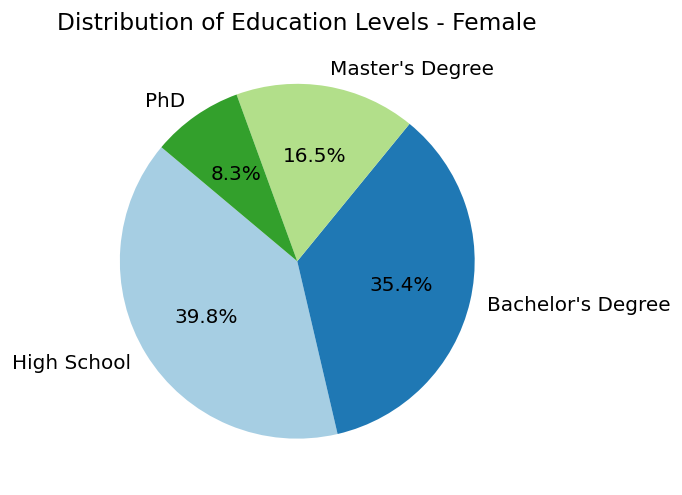

In [23]:
plt.pie(female_edu_count, labels=["High School", "Bachelor's Degree", "Master's Degree", "PhD"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})
plt.title('Distribution of Education Levels - Female', fontsize=14)
plt.show()

# Modeling

First Model <br>
Salary = Education Level (Dummies)

Second Model <br>
Salary = Education Level + Gender + Education Level * Gender

Third Model <br>
Salary = Education Level + YOE + Education Level * YOE

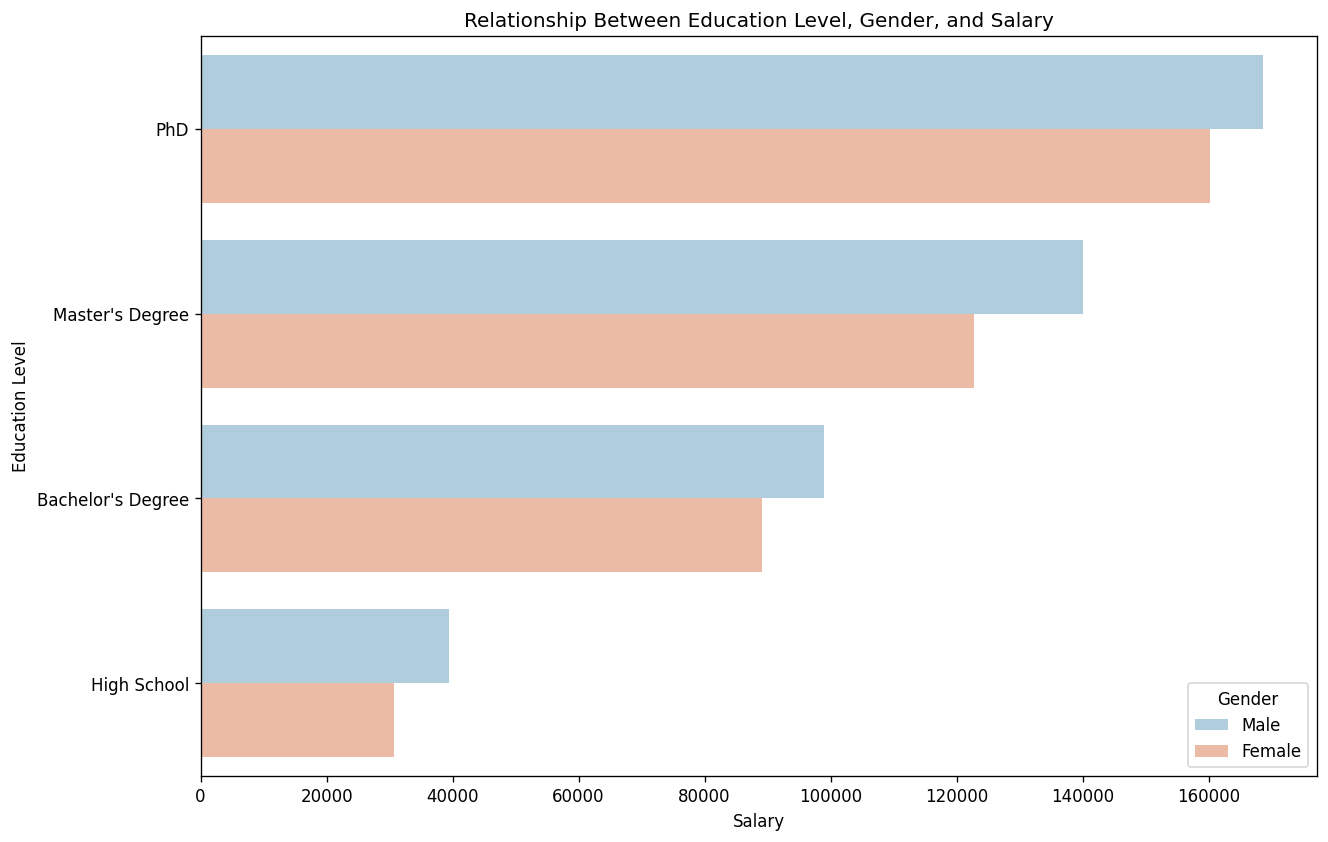

In [26]:
# Visualizing Relationship Between Education Level, Gender, and Salary
sorted_order = df.groupby('Education Level')['Salary'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Salary', y='Education Level', hue='Gender', palette='RdBu_r', order=sorted_order, errorbar=None)
plt.title('Relationship Between Education Level, Gender, and Salary')
plt.show()


In [27]:
# Encoding 'Gender' and 'Education Level' as dummy variables
#Female as baseline
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)
# High School as baseline
education_dummies = pd.get_dummies(df['Education Level'], prefix='Education').drop('Education_High School', axis=1)

# Concatenating the dummy variables with the original dataframe
df_encoded = pd.concat([df, gender_dummies, education_dummies], axis=1)

# Dropping the original 'Gender' and 'Education Level' columns
df_encoded.drop(['Gender', 'Education Level'], axis=1, inplace=True)

# Displaying the first few rows of the modified dataframe
df_encoded

,Age,Job Title,Years of Experience,Salary,Gender_Male,Education_Bachelor's Degree,Education_Master's Degree,Education_PhD
0,32,Software Engineer,5.00,90000,1,1,0,0
1,28,Data Analyst,3.00,65000,0,0,1,0
2,45,Senior Manager,15.00,150000,1,0,0,1
3,36,Sales Associate,7.00,60000,0,1,0,0
4,52,Director,20.00,200000,1,0,1,0
...,...,...,...,...,...,...,...,...
6679,49,Director of Marketing,20.00,200000,0,0,0,1
6680,32,Sales Associate,3.00,50000,1,0,0,0
6681,30,Financial Manager,4.00,55000,0,1,0,0
6682,46,Marketing Manager,14.00,140000,1,0,1,0


## Model 1

Salary = Education Level


$Salary = \beta_0  + \beta_1 \cdot Bachelor + \beta_2 \cdot Master + \beta_3 \cdot PhD$

In [28]:
import statsmodels.api as sm

# Building the regression model

# Selecting independent variables
independent_vars = list(education_dummies.columns)

# Adding a constant to the model (for the intercept)
X = sm.add_constant(df_encoded[independent_vars])
y = df_encoded['Salary']

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1662.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:59:30   Log-Likelihood:                -80305.
No. Observations:                6684   AIC:                         1.606e+05
Df Residuals:                    6680   BIC:                         1.606e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3.442e+04   1914.232     17.979      0.000    3.07e+04    3.82e+04
Education_Bachelor's Degree  6.067e+04   2047.712     29.627      0.000    5.67e+04    6.47e+04
Education_Master's Degree    9.566e+04   2127.005     44.975      0.000    9.15e+04    9.98e+04
Education_PhD                1.312e+05   2198.019     59.706      0.000    1.27e+05    1.36e+05
==============================================================================
Omnibus:                      116.512   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.412
Skew:                           0.323   Prob(JB):                     2.62e-27
Kurtosis:                       3.145   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2

Salary = Education Level + Gender + Education Level * Gender



$Salary = \beta_0 + \beta_1 \cdot Male + \beta_2 \cdot Bachelor + \beta_3 \cdot Master + \beta_4 \cdot PhD + \beta_5 \cdot Bachelor \cdot Male + \beta_6 \cdot Master \cdot Male+ \beta_7 \cdot PhD \cdot Male$

In [29]:
import statsmodels.api as sm

# Building the regression model
# Adding an interaction term between 'Gender_Male' and education levels
for col in education_dummies.columns:
    df_encoded[f'Interaction_{col}_Male'] = df_encoded[col] * df_encoded['Gender_Male']

# Selecting independent variables (education levels, gender, and interaction terms)
independent_vars = ['Gender_Male'] + list(education_dummies.columns) + [col for col in df_encoded.columns if 'Interaction' in col]

# Adding a constant to the model (for the intercept)
X = sm.add_constant(df_encoded[independent_vars])
y = df_encoded['Salary']

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     749.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:59:33   Log-Likelihood:                -80230.
No. Observations:                6684   AIC:                         1.605e+05
Df Residuals:                    6676   BIC:                         1.605e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.076e+04   2495.488     12.325      0.000    2.59e+04    3.56e+04
Gender_Male                                   8624.7035   3831.007      2.251      0.024    1114.706    1.61e+04
Education_Bachelor's Degree                   5.841e+04   2744.488     21.282      0.000     5.3e+04    6.38e+04
Education_Master's Degree                     9.194e+04   2773.271     33.152      0.000    8.65e+04    9.74e+04
Education_PhD                                 1.295e+05   3062.492     42.289      0.000    1.24e+05    1.36e+05
Interaction_Education_Bachelor's Degree_Male  1181.8454   4103.510      0.288      0.773   -6862.345    9226.036
Interaction_Education_Master's Degree_Male    8741.3467   4256.616      2.054      0.040     397.019    1.71e+04
Interaction_Education_PhD_Male                -179.9249   4429.277     -0.041      0.968   -8862.723    8502.873
==============================================================================
Omnibus:                      152.839   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.846
Skew:                           0.362   Prob(JB):                     1.60e-36
Kurtosis:                       3.262   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3

Salary = Education Level + YOE + Education Level * YOE

$Salary = \beta_0 + \beta_1 \cdot YoE + \beta_2 \cdot Bachelor + \beta_3 \cdot Master + \beta_4 \cdot PhD + \beta_5 \cdot Bachelor \cdot YoE + \beta_6 \cdot Master \cdot YoE + \beta_7 \cdot PhD \cdot YoE$

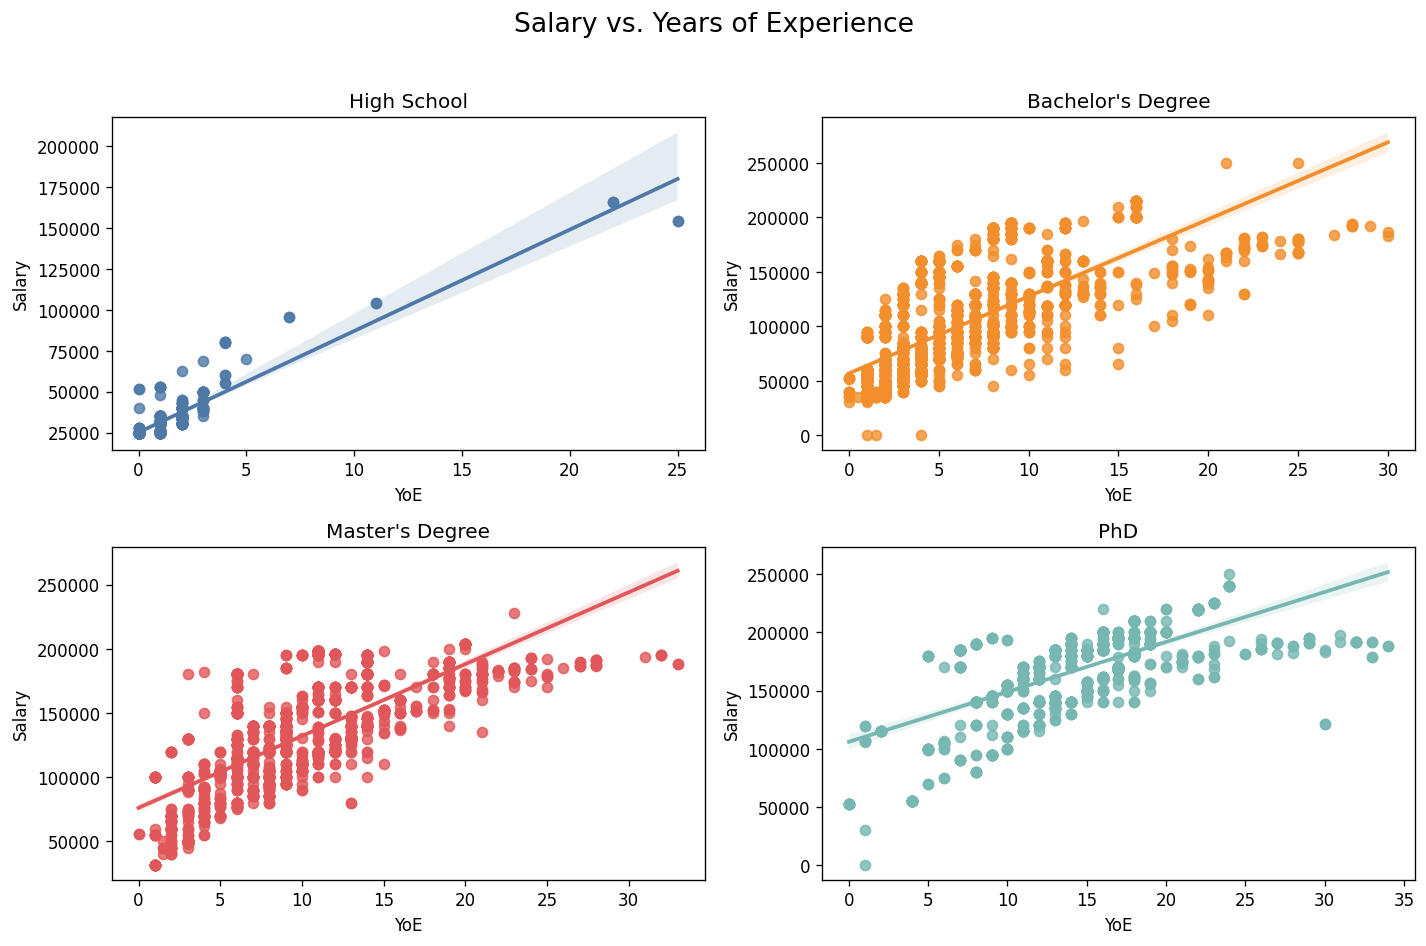

In [32]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Extract unique education levels from the dataframe
edu_levels = ['High School',"Bachelor's Degree", "Master's Degree", 'PhD' ]

# Define custom colors for each subplot
colors = colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']

# Iterate over each education level and plot in a separate subplot
for edu_level, ax, color in zip(edu_levels, axes.flatten(), colors):
    subset_df = df[df['Education Level'] == edu_level]
    sns.regplot(data=subset_df, x='Years of Experience', y='Salary', ax=ax, color=color)
    ax.set_title(edu_level)
    ax.set_xlabel('YoE')
    ax.set_ylabel('Salary')

# Adjust layout
fig.suptitle('Salary vs. Years of Experience', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure the title is visible without overlapping

plt.show()

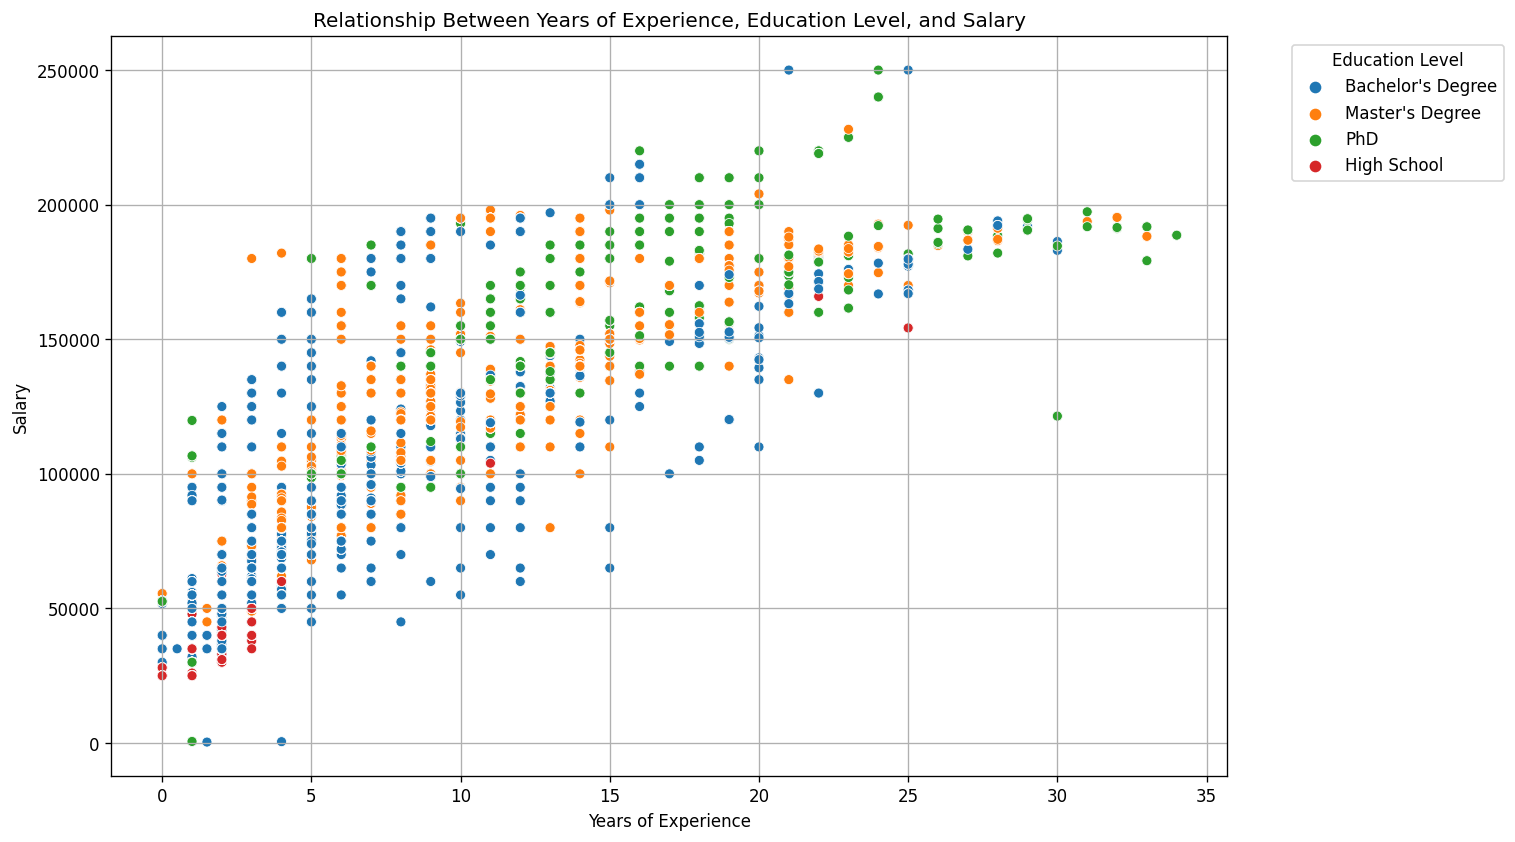

In [34]:
# Archive for reference!!

# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Education Level')
# plt.title('Relationship Between Years of Experience, Education Level, and Salary')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

In [35]:
# Creating dummy variables with High School as the reference category
data_with_dummies = pd.get_dummies(df, columns=['Education Level'])
data_with_dummies.drop(columns=['Education Level_High School'], inplace=True)

# Creating the interaction terms with the new dummy variables
for col in data_with_dummies.columns:
    if 'Education Level' in col:
        data_with_dummies[f'{col}:Years of Experience'] = data_with_dummies[col] * data_with_dummies['Years of Experience']

# Defining the independent variables (including the interaction terms) and the dependent variable
X = data_with_dummies.drop(columns=['Age', 'Gender', 'Job Title', 'Salary'])
y = data_with_dummies['Salary']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the new OLS model
model = sm.OLS(y, X).fit()

# Displaying the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2395.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:00:46   Log-Likelihood:                -77971.
No. Observations:                6684   AIC:                         1.560e+05
Df Residuals:                    6676   BIC:                         1.560e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   2.51e+04   1584.215     15.842      0.000     2.2e+04    2.82e+04
Years of Experience                                    6193.7191    550.559     11.250      0.000    5114.448    7272.990
Education Level_Bachelor's Degree                      3.163e+04   1781.428     17.757      0.000    2.81e+04    3.51e+04
Education Level_Master's Degree                        5.107e+04   2083.698     24.509      0.000     4.7e+04    5.52e+04
Education Level_PhD                                    8.092e+04   2672.109     30.283      0.000    7.57e+04    8.62e+04
Education Level_Bachelor's Degree:Years of Experience   883.1132    562.808      1.569      0.117    -220.170    1986.397
Education Level_Master's Degree:Years of Experience    -601.6989    564.111     -1.067      0.286   -1707.537     504.139
Education Level_PhD:Years of Experience               -1908.2074    569.235     -3.352      0.001   -3024.091    -792.324
==============================================================================
Omnibus:                      352.478   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.078
Skew:                           0.560   Prob(JB):                     6.04e-92
Kurtosis:                       3.506   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

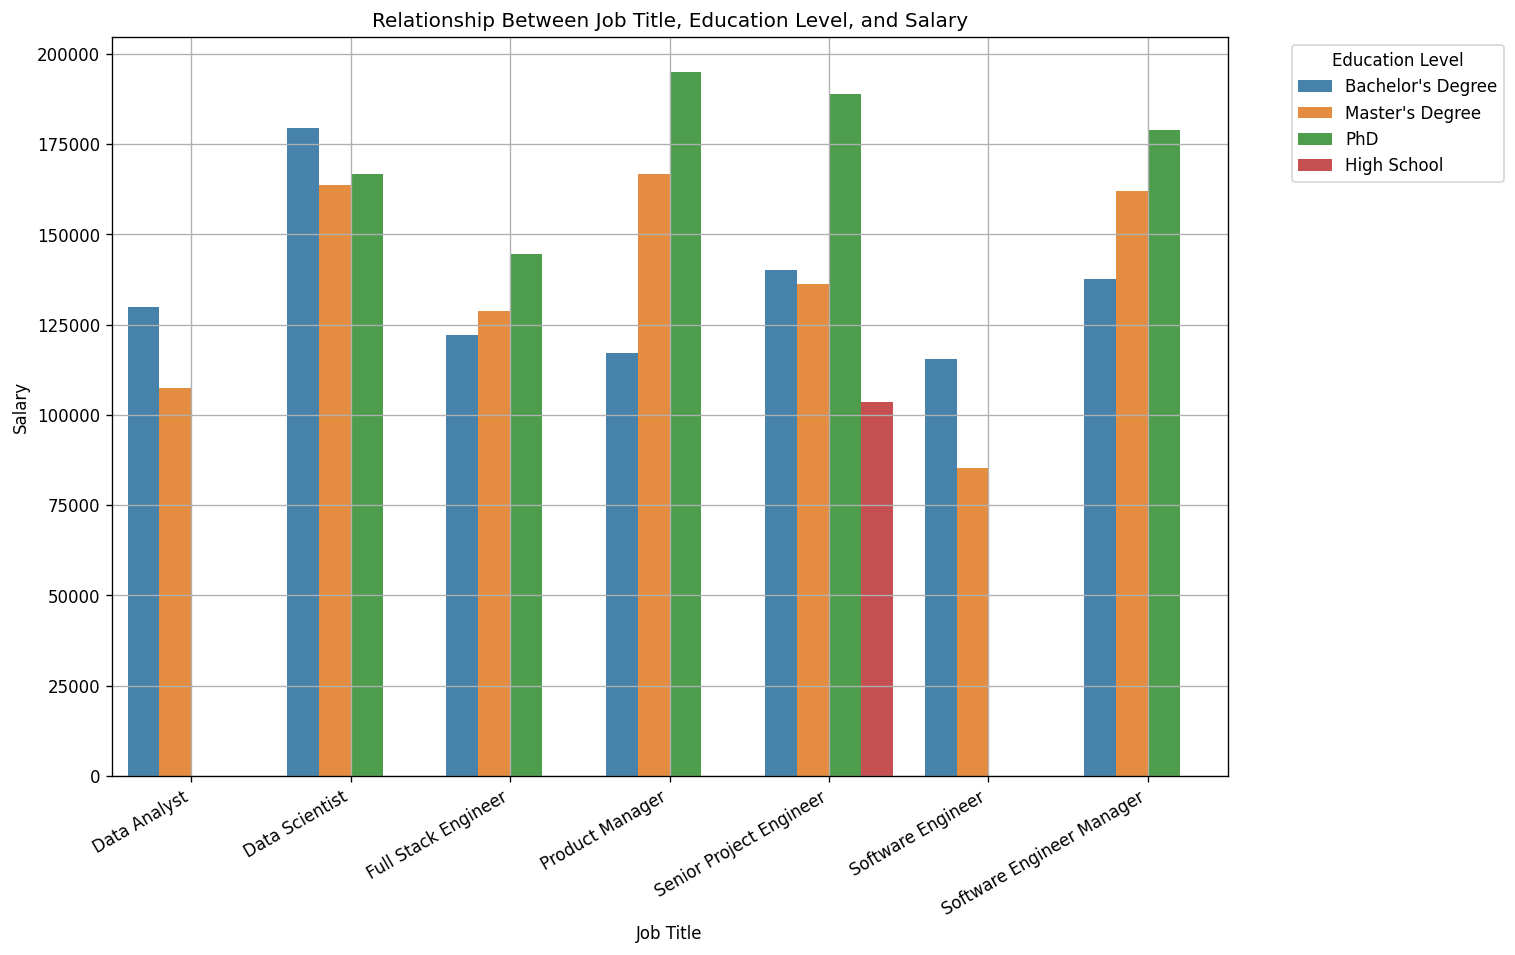

In [36]:
filtered_df = df.groupby('Job Title').filter(lambda x: len(x) > 300)

# Calculate the average salary for each combination of job title and education level
avg_salary_filtered = filtered_df.groupby(['Job Title', 'Education Level'])['Salary'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_salary_filtered, x='Job Title', y='Salary', hue='Education Level', errorbar=None, alpha = 0.9)
plt.title('Relationship Between Job Title, Education Level, and Salary')
hue_order = ['High School', 'PhD', 'Masters Degree','Bachelors Degree']
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=30, ha='right')
plt.show()

THANK YOU!